In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys 
import os
#!{sys.executable} -m pip install scikit-learn

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [351]:
df = pd.read_csv('./data/dataset_analysed.csv', dtype={'StateOfBuilding' : object})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114504 entries, 0 to 114503
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                114504 non-null  object 
 1   BathroomCount      114504 non-null  float64
 2   BedroomCount       114504 non-null  int64  
 3   ConstructionYear   66591 non-null   float64
 4   Country            114504 non-null  object 
 5   District           114504 non-null  object 
 6   Fireplace          114504 non-null  float64
 7   FloodingZone       56440 non-null   object 
 8   Furnished          114504 non-null  float64
 9   Garden             114504 non-null  float64
 10  GardenArea         114504 non-null  float64
 11  Kitchen            64464 non-null   object 
 12  LivingArea         101071 non-null  float64
 13  Locality           114501 non-null  object 
 14  MonthlyCharges     12710 non-null   float64
 15  NumberOfFacades    73777 non-null   float64
 16  PE

In [352]:
# if GardenArea are NaN and Garden is 0 then GardenArea = 0

for elem in df.iterrows():
    if np.isnan(elem[1]['GardenArea']) and elem[1]['Garden'] == 0:
        df.at[elem[0], 'GardenArea'] = 0

df.drop(df[['Url', 'Country', 'MonthlyCharges','PropertyId','MunicipalityName', 'PostalCode','Garden','RefnisCode', 'Locality']], axis='columns',inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114504 entries, 0 to 114503
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BathroomCount      114504 non-null  float64
 1   BedroomCount       114504 non-null  int64  
 2   ConstructionYear   66591 non-null   float64
 3   District           114504 non-null  object 
 4   Fireplace          114504 non-null  float64
 5   FloodingZone       56440 non-null   object 
 6   Furnished          114504 non-null  float64
 7   GardenArea         114504 non-null  float64
 8   Kitchen            64464 non-null   object 
 9   LivingArea         101071 non-null  float64
 10  NumberOfFacades    73777 non-null   float64
 11  PEB                81957 non-null   object 
 12  Price              114504 non-null  int64  
 13  Province           114504 non-null  object 
 14  Region             114504 non-null  object 
 15  RoomCount          31972 non-null   float64
 16  Sh

In [353]:
# df_FloodingZone_nan = df[df['FloodingZone'].isna()]

# df_FloodinfZone_not_nan = df[df['FloodingZone'].notna()]

# #predict the missing FloodingZone category using the other features using svm classifier

# from sklearn.svm import SVC

# X = df_FloodinfZone_not_nan
# X = X.drop('FloodingZone', axis=1)
# y = df_FloodinfZone_not_nan['FloodingZone']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# svm = SVC()
# svm.fit(X_train, y_train)

# y_pred = svm.predict(X_test)

# print(mae(y_test, y_pred))


In [354]:
df[['Price', 'BedroomCount','GardenArea','LivingArea','Furnished','NumberOfFacades','ConstructionYear']].corr()

,Price,BedroomCount,GardenArea,LivingArea,Furnished,NumberOfFacades,ConstructionYear
Price,1.000000,0.352321,0.101142,0.463487,0.043920,0.197807,-0.030851
BedroomCount,0.352321,1.000000,0.087759,0.595088,-0.004918,0.175942,-0.180308
GardenArea,0.101142,0.087759,1.000000,0.130622,0.010786,0.106694,-0.068494
LivingArea,0.463487,0.595088,0.130622,1.000000,-0.009177,0.231511,-0.217225
Furnished,0.043920,-0.004918,0.010786,-0.009177,1.000000,-0.020461,-0.023031
NumberOfFacades,0.197807,0.175942,0.106694,0.231511,-0.020461,1.000000,0.043145
ConstructionYear,-0.030851,-0.180308,-0.068494,-0.217225,-0.023031,0.043145,1.000000


In [355]:
# #knn on localities 
# import sklearn.neighbors as neighbors  


# knn = neighbors.KNeighborsClassifier(n_neighbors=20)
# y = X_train['Locality']


# knn.fit(X,y)

# y_pred = knn.predict(X_test)

# print(mae(y_test, y_pred))

In [356]:
# one hot encoding 
df = pd.get_dummies(df, columns=['District', 'FloodingZone', 'Kitchen', 'PEB', 'Province', 'Region' , 'StateOfBuilding' , 'SubtypeOfProperty' , 'TypeOfSale' , 'Fireplace' , 'ConstructionYear','NumberOfFacades','RoomCount' , 'ShowerCount','SwimmingPool','Terrace', 'ToiletCount','TypeOfProperty','Furnished','BathroomCount','BedroomCount'], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114504 entries, 0 to 114503
Columns: 541 entries, GardenArea to BedroomCount_200
dtypes: bool(537), float64(3), int64(1)
memory usage: 62.1 MB


In [357]:
# replace nan by mean for the numerical features
df.fillna(df.mean(), inplace=True)

In [358]:
# normalize the data

columns=["GardenArea", "LivingArea","SurfaceOfPlot"]
for column in columns:
    #rescale the data between 0 and 1
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    



In [359]:
df

,GardenArea,LivingArea,Price,SurfaceOfPlot,District_Antwerp,District_Arlon,District_Ath,District_Bastogne,District_Brugge,District_Brussels,...,BedroomCount_44,BedroomCount_45,BedroomCount_47,BedroomCount_48,BedroomCount_60,BedroomCount_63,BedroomCount_70,BedroomCount_88,BedroomCount_100,BedroomCount_200
0,0.016793,0.047321,5500,0.000022,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.000000,0.021727,2700,0.000028,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.000000,0.005233,900,0.000028,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.000000,0.089978,12000,0.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.000000,0.016786,37,0.000028,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114499,0.000000,0.008418,219000,0.000028,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114500,0.001120,0.013650,409000,0.000002,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114501,0.000000,0.035150,599000,0.000002,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114502,0.000000,0.008645,245000,0.000028,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [360]:
y = df['Price'].values
X = df.drop('Price', axis=1).values

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)


In [362]:
#dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=200)



X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



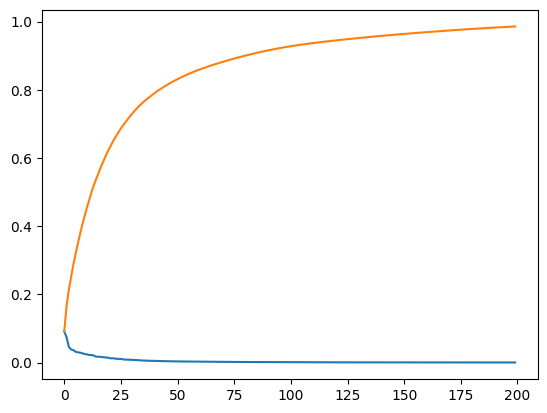

In [363]:
# plot individual variance explained by each component and cumulative variance explained by the first n components
plt.bar(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


In [364]:
from sklearn.ensemble import RandomForestRegressor as RFR

regressor = RFR(max_depth=11)

regressor.fit(X_train, y_train)

In [ ]:
regressor.score(X_train, y_train)

0.8251467927316157

In [ ]:
regressor.predict(X_train)

array([   4187.21036186,  275006.88405889,    3131.49027418, ...,
        193892.8217927 ,    7549.5403744 , 1249613.49110871])

In [ ]:
mae(y_train, regressor.predict(X_train))

101260.8853883585